In [8]:
import cv2 as cv
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
import os

In [19]:
kernel_3x3 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
kernel_5x5 = np.array([[-1,-1,-1,-1,-1],[-1,1,2,1,-1],[-1,2,4,2,-1],[-1,1,2,1,-1],[-1,-1,-1,-1,-1]])
kernel_7x7 = np.array([[-1,-1,-1,-1,-1,-1,-1],[-1,2,2,2,2,2,-1],[-1,2,4,6,4,2,-1],[-1,2,8,12,8,2,-1],[-1,2,4,6,4,2,-1],[-1,-1,-1,-1,-1,-1,-1]])

In [ ]:
def plot_image(*img):
    # Setting the grid size
    plt.figure(figsize=(20,20), layout='constrained')

    # Plotting the original image
    for i in range(len(img)):
        plt.subplot(len(img), 2, i+1)
        plt.title(f'Image {i+1}')
        plt.imshow(img[i])
        plt.axis('off')

In [30]:
img = cv.imread('graf1.png')
blur_3x3 = cv.filter2D(img,-1,kernel_3x3)
blur_5x5 = cv.filter2D(img,-1,kernel_5x5)

#  guassian blur
blur_7x7 = cv.GaussianBlur(img,(7,7),0)
# high pass filter
g_hpf = img - blur_7x7

# cv.imshow('Original',img)
# cv.imshow('Averaging 3x3',blur_3x3)
# cv.imshow('Averaging 5x5',blur_5x5)
# cv.imshow('Averaging 7x7',blur_7x7)

[[[214 207 218]
  [214 205 217]
  [211 202 213]
  ...
  [ 35  29  30]
  [ 34  27  30]
  [ 33  26  30]]

 [[213 206 219]
  [213 205 218]
  [212 203 215]
  ...
  [ 36  29  31]
  [ 34  27  30]
  [ 34  26  30]]

 [[206 200 218]
  [207 201 218]
  [209 201 217]
  ...
  [ 36  30  32]
  [ 35  28  31]
  [ 34  27  31]]

 ...

 [[ 25  26 178]
  [ 25  26 179]
  [ 24  28 180]
  ...
  [ 46  40  41]
  [ 46  40  40]
  [ 46  39  40]]

 [[ 25  27 181]
  [ 25  27 181]
  [ 25  28 182]
  ...
  [ 46  40  41]
  [ 45  40  41]
  [ 45  40  40]]

 [[ 24  27 182]
  [ 25  28 183]
  [ 25  28 183]
  ...
  [ 45  40  41]
  [ 45  40  41]
  [ 45  40  41]]]


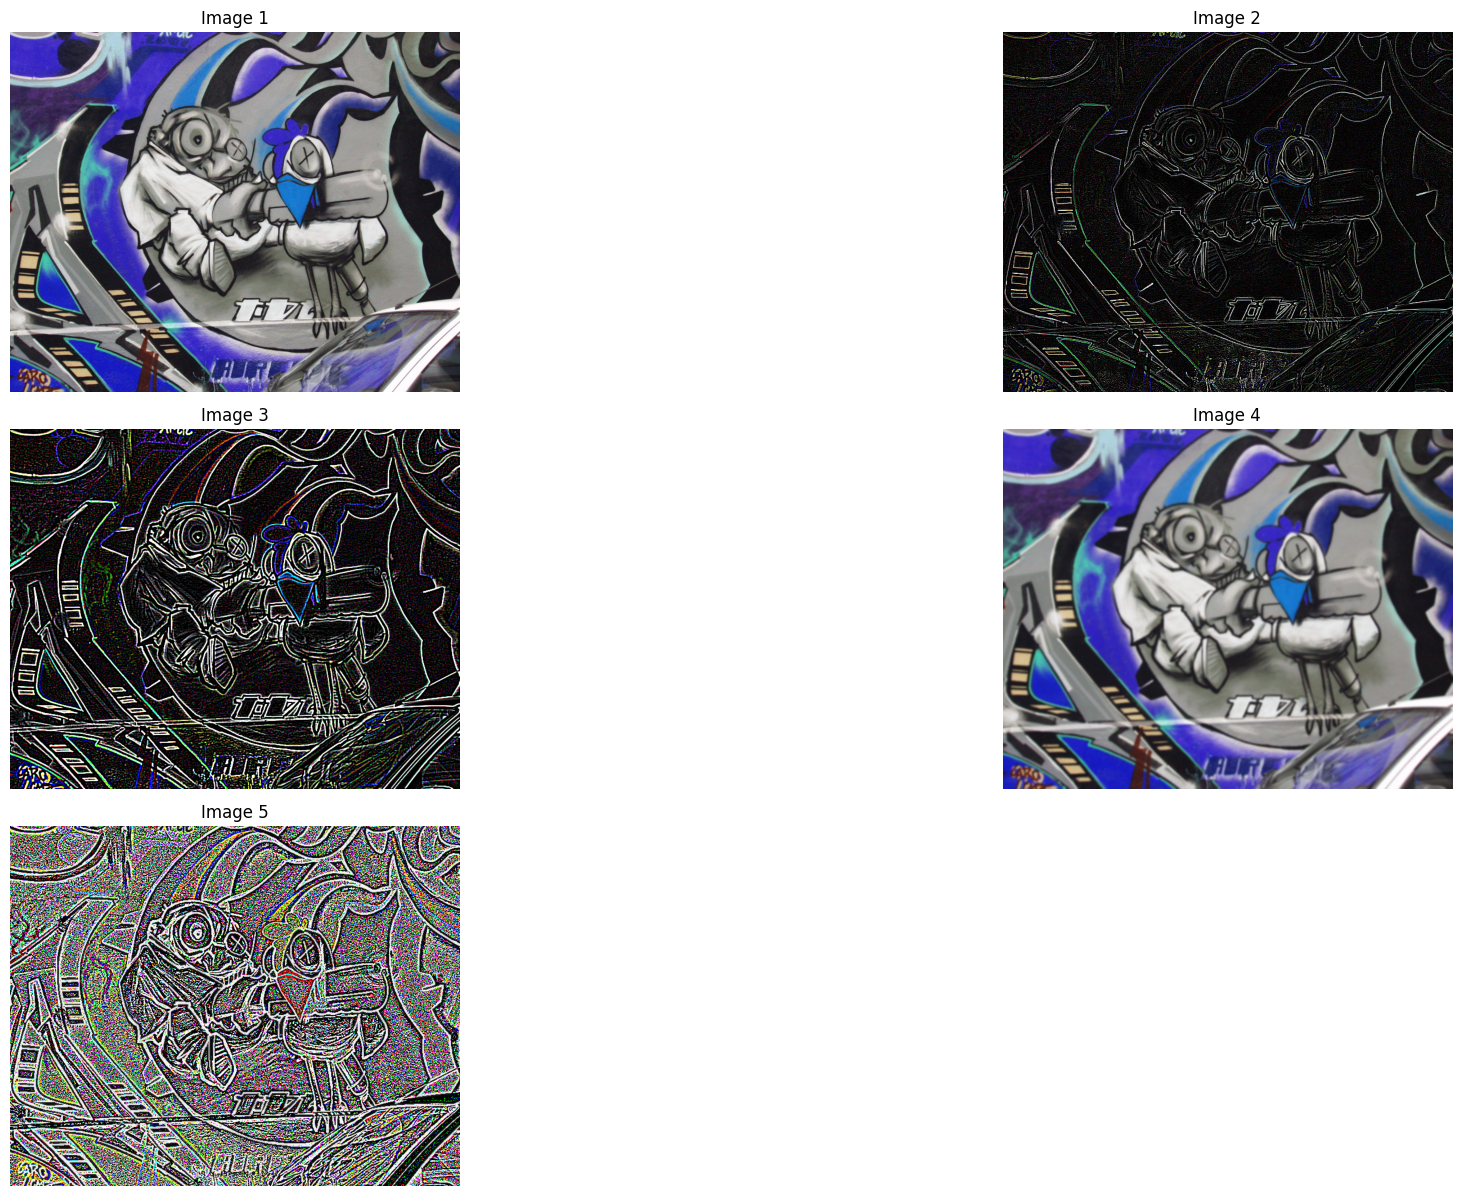

In [49]:
print(blur_7x7)
plot_image(img, blur_3x3, blur_5x5, blur_7x7, g_hpf)